# **DDC-6: A Poisson counter**
A Poisson random variable is the number of iterations it takes for a randomly decreasing number to be smaller than a target value. It is used in physics and computational biology to estimate the duration of different events.

**Part 1.** Write a Python function that calculates a Poisson random number. Translate the following algorithm into code.

1. Initialize a counter to zero.

2. Initialize a “current value” numerical variable to 1.

3. Initialize a target variable as exp(-λ) (λ is a parameter).

4. In a while-loop, generate a random number from a standard uniform distribution (that is, equal probability of a number between 0 and 1) and scale that by the current-value variable. Increment the counter by 1.

5. Remain in the while-loop until the current-value is less than the target.

6. Return the counter value. This is the random Poisson variable.

Check your code using λ=10. The result will be an integer that will differ each time you call the function, but the counter should be close to 10.

**Part 2.** Call the function 500 times using λ=10, and show a bar plot of the distribution of random Poisson variables. An interesting feature of a Poisson distribution is that the mean and variance equal each other, which also equals λ. In finite sample sizes, the mean and variance won’t equal exactly λ, but it should be fairly close.
<p align="center">
  <img src="images/img_ddc_006.png" alt="006" width="700">
</p>

In [53]:
# Libs
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [80]:
# Part 1

def poission_random_number_generator(lam):
    
    counter = 0
    current_val = 1
    target_val = np.exp(-lam)

    while current_val > target_val:
        current_val *= np.random.rand()
        counter += 1
    
    return counter

poission_random_number_generator(10)

17

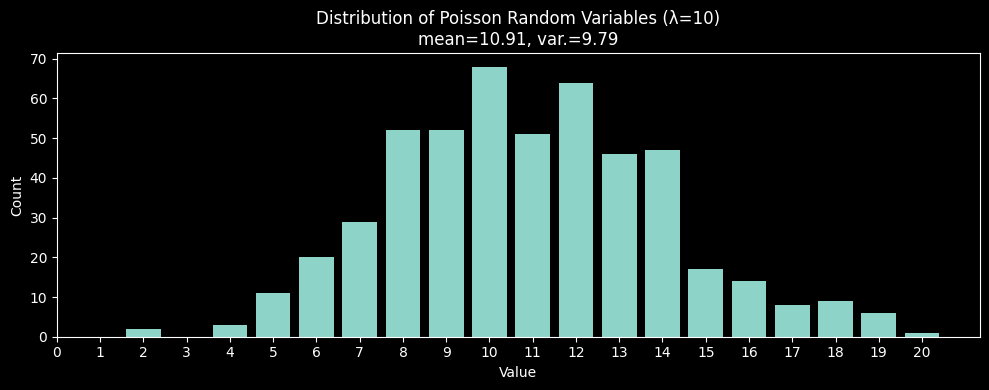

In [89]:
# Part 2

lam = 10
n = 500

vals = np.zeros(n,dtype=int)

for i in range(n):
    vals[i] = poission_random_number_generator(lam)

uniq,counts = np.unique(vals, return_counts=True)

plt.figure(figsize=(10,4))
plt.bar(uniq,counts)
plt.gca().set(xlabel="Value",ylabel="Count",xticks=range(0,max(uniq)+1))
plt.title(f"Distribution of Poisson Random Variables (λ={lam})\nmean={np.mean(vals):.2f}, var.={np.var(vals):.2f}")
plt.tight_layout()
plt.show()